In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [126]:
df=pd.DataFrame({'position':['Business Analyst','Junior Consultant','Senior Consultant','Manager','Country Manager','Region Manager','Partner','Senior Partner','C-level','CEO'],'level':[1,2,3,4,5,6,7,8,9,10],'salary':[45000,50000,60000,80000,110000,150000,200000,300000,500000,1000000]})
df

,position,level,salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Here,to check any null values


In [127]:
df.isnull().sum()

,0
position,0
level,0
salary,0


Here,position name is unnecessary.So,we can remove.

In [128]:
df=df.drop(['position'],axis=1)
df

,level,salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [129]:
X=df['level'].copy()  #dependent
y=df['salary'].copy()  #independent


In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)


In [131]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [132]:
y_train_pred=reg.predict(x_train)

In [133]:
td=pd.DataFrame()
td['trainx']=x_train.ravel()
td['trainy']=y_train
td['pred']=y_train_pred
td

,trainx,trainy,pred
0,4,80000,125934.664247
1,9,500000,555108.892922
2,1,45000,-131569.872958
3,3,60000,40099.818512
4,10,1000000,640943.738657
5,8,300000,469274.047187
6,7,200000,383439.201452
7,5,110000,211769.509982


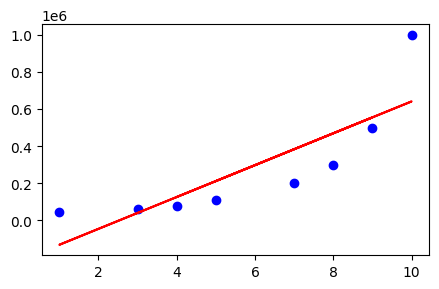

In [134]:
plt.figure(figsize=(5,3))
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,y_train_pred,color='r')
plt.show()

In the above graph,we can see that prediction points are far away from the actual points.In this case we ahve to use polynomial linear regression

In [135]:
from sklearn.preprocessing import PolynomialFeatures
f=PolynomialFeatures(degree=2)

In [136]:
x_train_poly=f.fit_transform(x_train)

In [137]:
reg.fit(x_train_poly,y_train)

LinearRegression()

In [138]:
y_train_polypred=reg.predict(x_train_poly)

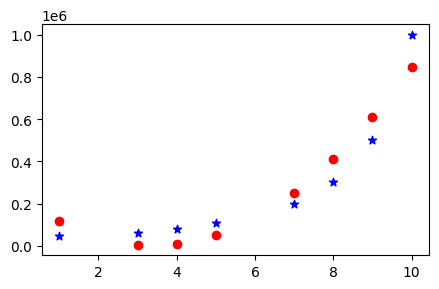

In [139]:
plt.figure(figsize=(5,3))
plt.scatter(x_train,y_train,color='blue',marker='*')
plt.scatter(x_train,y_train_polypred,color='r')
plt.show()

**Now,we can see both points are close to each other**